In [1]:
from keras.applications import InceptionV3, ResNet50,VGG16, VGG19, Xception, imagenet_utils

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_v3 import preprocess_input

In [3]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [4]:
img_folder = '../images/classificate/'
model_list = ['VGG-16','VGG-19','Inception v3', 'ResNet50',"XCeption"]


In [5]:
input_shape = (224, 224)
inception_input_shape = (299, 299)

If the notebook is running the first time, model weights will be downloaded. The size of model weights is ~ 1Gb

In [6]:
models = {
    VGG16:input_shape,
    VGG19:input_shape,
    InceptionV3:inception_input_shape, 
    ResNet50:input_shape,
    Xception:inception_input_shape
        }

In [7]:
display_list = []
j = 0
# Go over models
for i, (model, shape) in enumerate(models.items()):
    weights = model(weights='imagenet')
    # Preprocess images due to the chosen model
    if shape == inception_input_shape:
        preprocess = preprocess_input
    elif shape == input_shape:
        preprocess = imagenet_utils.preprocess_input
    # Append list with list of ones which will be replaced with lists of printing information
    display_list.append([]*len(os.listdir(img_folder)))    
    # Choose images from dir
    for img_file in os.listdir(img_folder):
        # Update counter
        j += 1
        # Get a single image out of folder
        image_file = os.path.join(img_folder, img_file)
        # Convert it to np.ndarray and reshape
        image = load_img(image_file, target_size=shape)
        image = img_to_array(image)
        # Expand the dimention to be able to pass the image through the network
        image = np.expand_dims(image, axis=0)
        # Preprocess the image
        image = preprocess(image)
        
        encoded_preds = weights.predict(image)
        pred = imagenet_utils.decode_predictions(encoded_preds)
        
        display_list[i].append([1] * 5)
   #     print(display_list[i])
   #     print(j)
  #      print(display_list[i][j % len(os.listdir(img_folder))-1])
   # print(0)
    
    # THERE IS A TYPO IN A SELECTED AREA
        for k, (_, label, probability) in enumerate(pred[0]):
            display_list[i][j % len(os.listdir(img_folder))-1][k] = "{}: {:.2f}%".format(label, probability * 100)
            print("{}. {}: {:.2f}%".format(k + 1, label, probability * 100))
            
        print('  ')

1. Labrador_retriever: 29.30%
2. golden_retriever: 22.09%
3. beagle: 14.04%
4. redbone: 8.22%
5. kelpie: 4.83%
  
1. convertible: 26.02%
2. sports_car: 26.00%
3. car_wheel: 17.44%
4. beach_wagon: 9.73%
5. racer: 8.96%
  
1. Siamese_cat: 6.72%
2. Christmas_stocking: 4.46%
3. book_jacket: 3.95%
4. comic_book: 3.09%
5. sunscreen: 3.06%
  
1. grey_fox: 54.84%
2. kit_fox: 14.59%
3. badger: 8.14%
4. Arctic_fox: 4.73%
5. timber_wolf: 3.30%
  
1. reflex_camera: 56.48%
2. Polaroid_camera: 11.39%
3. racer: 6.51%
4. projector: 5.24%
5. lens_cap: 4.62%
  
1. dumbbell: 25.11%
2. pencil_sharpener: 8.51%
3. saltshaker: 7.48%
4. lighter: 5.03%
5. street_sign: 4.10%
  
1. crane: 67.84%
2. harvester: 8.74%
3. wreck: 8.44%
4. thresher: 4.23%
5. lumbermill: 2.34%
  
1. comic_book: 10.30%
2. coffee_mug: 7.61%
3. cup: 5.90%
4. jigsaw_puzzle: 5.82%
5. piggy_bank: 5.20%
  
1. cheetah: 82.76%
2. leopard: 17.21%
3. jaguar: 0.03%
4. snow_leopard: 0.00%
5. lion: 0.00%
  
1. suit: 75.72%
2. Windsor_tie: 9.47%
3. o

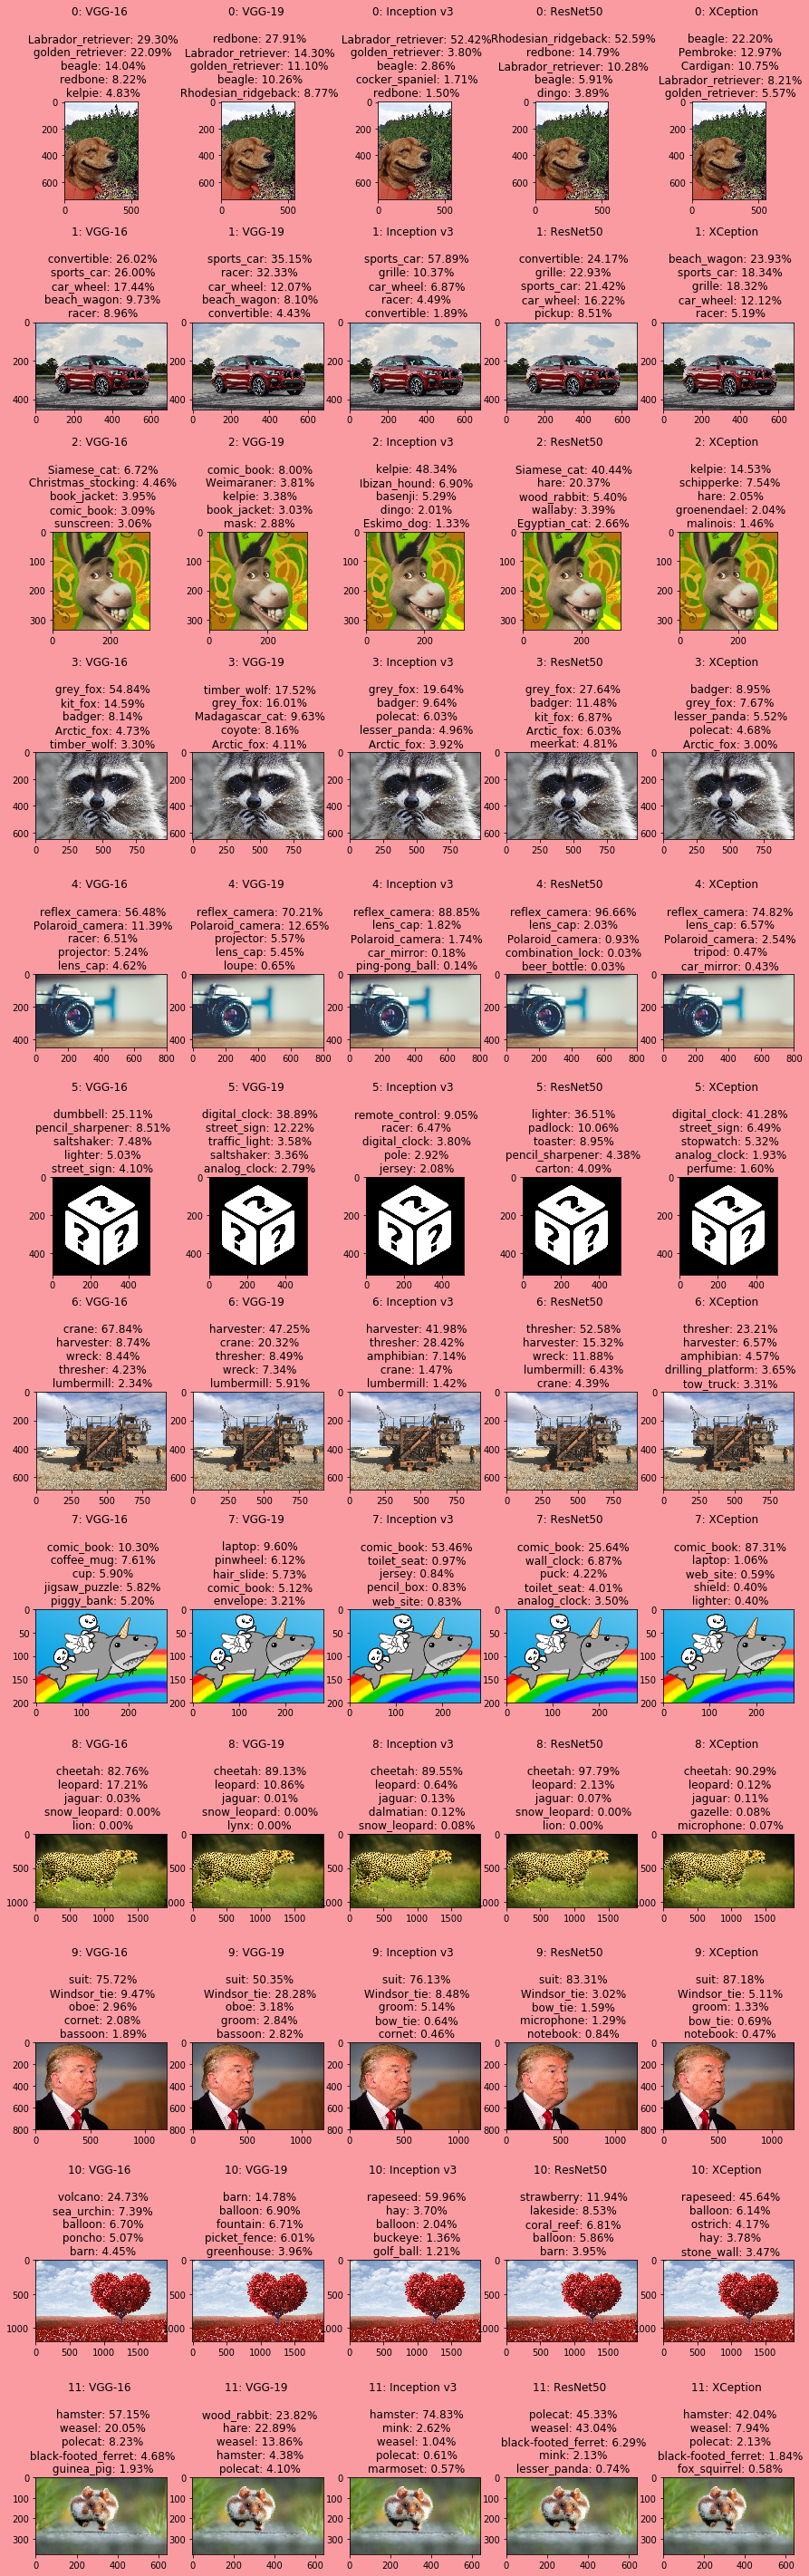

In [8]:

plt.figure(figsize=(3*len(models),10*len(display_list)), facecolor='#fa9ba2')


firstfont = {'fontsize':'12', 'fontname':'sans-serif'}
plt.subplots_adjust(hspace=1.2)

j = 0
# Loop over images in folder
for i, item in enumerate(os.listdir(img_folder)):
    image = os.path.join(img_folder, item)
    loaded = load_img(image)
    # Loop over models per image
    for t in range(0, len(models)):

        plt.subplot(len(os.listdir(img_folder)), len(models), j+1)
        title_3 = ''.join(str(display_list[t][i])).replace(',','\n').replace('[','').replace(']','').replace("'","")
        plt.title('{}: {} \n\n {}'.format(i, model_list[t], title_3), **firstfont)
       # plt.title(f'{i, t}')
        plt.imshow(loaded)
        j += 1
    
plt.show()